# CMPT 423/820 Assignment 2 Question 1
### Model Solution and Grading Scheme

## Prologue: Importing and reading the Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

# a list of names for the columns in the data
cnames=['SepalLengthCm', 'SepalWidthCm',
        'PetalLengthCm', 'PetalWidthCm', 'Species']
dataframe = pd.read_csv('iris.csv', 
                        header=None, 
                        names=cnames, 
                        index_col=False)

# Separate the features from the class
array = dataframe.values
X = array[:,0:4]
Y = array[:,4]


## Part 1.  Four 1-Feature Classifiers
The question asks for 4 one-feature classifiers.  To do this, I'll split the data into individual columns.  To evaluate the classifiers, I'll use simple 10-fold cross-validation. 

In [5]:
for column in range(4):
    # select the column
    X_col_train = X[:,column:column+1]
    
    # cross validation to evaluate the performance using accuracy
    kfold = 10
    cv_results = model_selection.cross_val_score(GaussianNB(), X_col_train, Y, 
                                                 cv=kfold, scoring='accuracy')

    #displaying the mean and standard deviation of the prediction
    msg = "%s %s: \t%f (%f)" % ('NB accuracy for feature', cnames[column], 
                                cv_results.mean(), cv_results.std())
    print(msg)


NB accuracy for feature SepalLengthCm: 	0.726667 (0.081377)
NB accuracy for feature SepalWidthCm: 	0.560000 (0.067987)
NB accuracy for feature PetalLengthCm: 	0.953333 (0.042687)
NB accuracy for feature PetalWidthCm: 	0.953333 (0.052068)


### Commentary: solutions and grading
Some form of evaluation on a test set is necessary.  It's not good enough to compare error from the training set only.  The following variations are acceptable for full marks:
* A simple test-training split of the data.  This is not as good as CV, because the results will be more dependent on the particular split.
* Cross-validation with a different $k$, and a different proportion of the data set aside for testing.

The results will depend on the method used.  The accuracies might be a bit higher or lower.  The 4th column ("petal width") is expected to have the highest accuracy.  The second column ("sepal width") should have the lowest accuracy.

**Grading**
For full marks:
* Your Python scripting was neat and presentable.  
* You made good use of Python comments, and Markdown cells to explain your method to a reader.
* You calculated the accuracies correctly (using cross-validation or a test-training. split of the data), and presented them neatly.

## Part 2: One Four-Feature Classifier
Now we'll use all the features, repeating the evaluation with simple 10-fold cross-validation. 

In [6]:
# cross validation to evaluate the performance using accuracy
kfold = 10
cv_results = model_selection.cross_val_score(GaussianNB(), X, Y, cv=kfold, scoring='accuracy')

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy using all columns', cv_results.mean(), cv_results.std())
print(msg)


NB accuracy using all columns: 0.953333 (0.042687)


### Commentary: solutions and grading
The accuracy should be calculated with the same methodology, preferably exactly the same details.  Using the same method means the comparison is least susceptible to false conclusions.

The results will depend on the method used to evaluate accuracy.  A simple test-train split could make the four-feature classifier look better than the best 1-feature classifier.  In any case, it should be close.

**Grading**
This part has no grade associated with it.

## Part 3: Density plots
Now we plot the density of the data. The Assignment description suggested A1Q7 Task 4, but using Seaborn seemed easier.  It should have been copy-paste, anyway. 

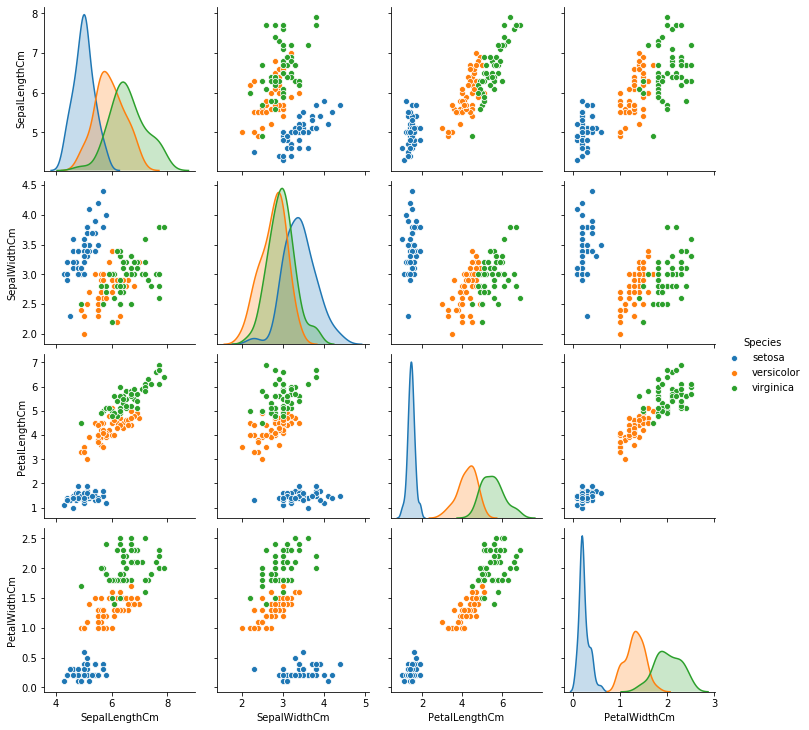

In [4]:
sns.pairplot(dataframe, hue="Species", diag_kind='kde')
plt.show()

The density plots are above, along the diagonal. Each curve represents the distribution of the feature for a given class value (setosa, versicolor, virginica).  In other words, each curve represents $P(F|C)$. While the density plots are not simple Gaussian distributions (they are a bit lumpy in places), the Gaussian Naive Bayes classifier would fit nice neat bell curves in place of these densities.  

The more overlap there is between the density curves for a given feature, the less well the feature does as a single feature classifier.  The best feature is Petal Width, becasue the curves are most separated.  The worst feature is Sepal Width, because of the high degree of over-lap.

### Commentary: solutions and grading
I got lazy, and used Seaborn for the visualization.  This is perfectly acceptable.  The code from A1Q7 could be adapted here as well.  A good job shows the graphs neatly.  Colour and labelling is optional.  

There are 2 lessons here.
1. If the class densities overlap a lot, classifiers can have low accuracy.  This is not a flaw in Naive Bayes.  This is a property of all classifiers.  
1. If a classifier can look at combinations of features, there is still a chance that the classifer can be accurate.  This is what the scatter plots tell us (above).  So over-lapping features is not a guarantee of poor accuracy.  This is a flaw in Naive Bayes.  The way Naive Bayes combines the features may not give good accuracy.

**Grading**
For full marks:
* The discussion should try to draw a connection between overlap in the density estimate, and the one-feature classifier accuracy.  
* The discussion was short.  


## Part 4: Classifier Comparison
According to accuracy metric, the best one-feature classifier outperforms the four-feature classifier by a relatively small amount.  This implies that the four-feature classifier is incorrectly classifying a few more test set examples.  

### Commentary: solutions and grading
Depending on the method used to calculate accuracy (simple split, or cross-validation), the answer can be different.  For some simple splits, the four-feature classifier might be a bit better.  This shows the robustness of cross-validation.

The discussion should reach the conclusion that one is a bit better.  There's no need to explain the conclusion.

**Grading**
For full marks
* You compared the best 1-feature classifier to the 4-feature classifier in terms of accuracy.
* Your discussion was short.